# Jupyter+Slideをもっと便利に

### デフォルトにあるSlide機能

* convert/serveがめんどい
* コード部分いらない
* スタイルがイマイチ

### RISE

* reveal.jsベース
* Notebook上からボタン一発でスライドに切り替え
* スライド上からコードを実行できる

> https://github.com/damianavila/RISE

#### Install

```bash
pip install RISE
jupyter-nbextension install rise --py --sys-prefix
jupyter-nbextension enable rise --py --sys-prefix
```

### コードの実行デモ

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


@interact(theta=(1, 10, 1))
def f(theta):
    x = np.linspace(-1, 1, 100)
    y = [np.sin(theta * x_) ** 2 for x_ in x]
    plt.plot(x, y)

interactive(children=(IntSlider(value=5, description='theta', max=10, min=1), Output()), _dom_classes=('widget…

### Hide input / Hide input All

* nbextensions
* コード部分を隠せる
* Hide input  
  -> 特定のセルのコードを隠す
* Hide input All  
  -> Notebook上のすべてのコードを隠す
* 静的に隠した状態を保存できないので、なにか方法がないか検討ちう

### コードを隠した例

現状ではRISEでしかできない？

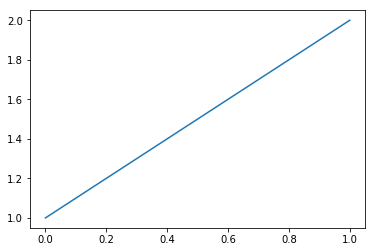

In [2]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2])
plt.show()

### IPython.display.HTML, %%HTML(Cell Magic)

* HTML記法の内容を出力できる
* Markdownで表現できない部分を補える
* スタイルを変更できる

In [3]:
from IPython.display import HTML

HTML('<font color="#ff0000">red</font>')

In [4]:
%%HTML
<font color="#ff0000">red</font>

### IPython.display.IFrame

* 指定したURLからHTMLとして埋め込める
* サイトの紹介をしたいときなどに便利

In [5]:
from IPython.display import IFrame

IFrame('https://python.jp', 600, 400)

### IPython.display.Video
* ローカルにある動画を埋め込める
* デモが難しい場合などに便利そう

In [6]:
from IPython.display import Video

Video('nc27125.mp4')

### IPython.display.YouTubeVideo

* YouTubeの動画を埋め込める
* プロモーションビデオなどが既にある場合などに便利そう

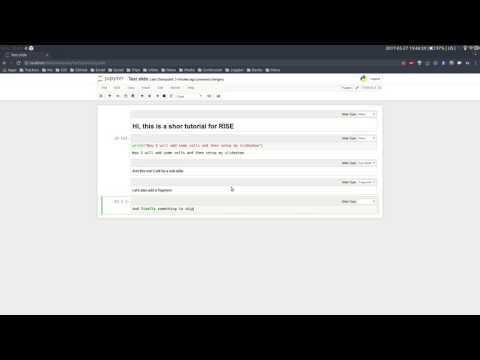

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo('sXyFa_r1nxA')

### IPython.display.Markdown

* Markdown記法の内容を出力できる
* コードの実行結果を埋め込みたい場合などに便利

In [8]:
from IPython.display import Markdown
from datetime import datetime

Markdown('''
* 今日は{0:%m}月{0:%d}日です
* いまは{0:%H}時{0:%M}分です
'''.format(datetime.today()))


* 今日は05月05日です
* いまは15時42分です


### jinja2

* テンプレートエンジン
* HTMLとMarkdownなどを組み合わせると色々できそう
* 自己紹介などテンプレ的なものを作っておくと便利そう

In [9]:
from jinja2 import Template

name = '井上喜久子'
age = (datetime.today() - datetime(1964, 9, 25)).days // 365
age = 17
data = {'age': age, 'name': name}
tpl = Template('{{ name }} さんは {{ age }} 歳です。')
print(tpl.render(data))

井上喜久子 さんは 17 歳です。


### pandas.DataFrame.style

* pandasのDataFrameにさまざまなスタイルを設定できる
* 表中から特定の箇所を強調するなどに便利

In [10]:
import pandas as pd


def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


df = pd.DataFrame(np.random.rand(4, 4))
df.style.apply(highlight_max)

,0,1,2,3
0,0.856196,0.783144,0.281343,0.373142
1,0.398269,0.706975,0.0859492,0.313883
2,0.0620631,0.217332,0.990407,0.622948
3,0.22312,0.836461,0.323799,0.0790808


### Hosting

SlideShareやSpeakerDeckのようなシェアする方法がない  
HTMLとしてはできるが、スライド形式ではない

少々無理やりだがやりようがある

1. ipynb -> htmlにコンバート
2. reveal.jsの環境をclone
3. gh-pagesなどにpush

> 参考: http://www.procrasist.com/entry/5-jupyter-slide

### TBD

シェアすることまで考えると  
.ipynb -> .md -> GitPitch  
の流れが楽そうな気がしてきた

気が向いたらGitPitch用のconvertツールを作るかも？